## Welcome to my first project! 🙋‍♂️🏀

The next jupyter notebook will consist of a relatively extensive analysis of Randal Hopkins' "NBA Injuries from 2010-2020" dataset that you can find on Kaggle. The data within this dataset was scraped from the "Pro Sports Transactions" page, with the objective of gathering all those injuries that occurred in the NBA during that period. 

Dataset URL: https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018

## 1. Motivation & Inspiration 

My interest and curiosity in analyzing this dataset, comes from my passion for sports and everything related to the management that exists "behind" it. Due to the fact that most of the analysis has always touched the athlete's performance, I was intrigued to analyze this data to find out what interesting insights can be extracted for the public. 

## 2. Introduction

The purpose of this analysis is to conduct a thorough analysis of NBA injuries and to understand if there is a pattern in injuries. Some of the questions I wish to answer is:

- Who do injuries happen to?
- Have certain teams had more or less luck?
- Is there a particular time of year or day where injuries occur more frequently?

## 3. Load data and libraries 

In [2]:
# Load Libraries
import pandas as pd
import re
import nltk
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px

# File route in CSV 
ruta_archivo = "injuries_2010-2020.csv"

# Load the CSV file in a Dataframe 
df = pd.read_csv(ruta_archivo)

## 4. Checking/Inspecting the data 

In [3]:
df.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [4]:
df.columns

Index(['Date', 'Team', 'Acquired', 'Relinquished', 'Notes'], dtype='object')

In [5]:
df.isnull().sum()

Date                0
Team                2
Acquired        17563
Relinquished     9545
Notes               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          27105 non-null  object
 1   Team          27103 non-null  object
 2   Acquired      9542 non-null   object
 3   Relinquished  17560 non-null  object
 4   Notes         27105 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


- Date: date when the player got hurt.
- Acquired: indicates if the player returned to the team or leaved the team because he needed a major medical procedure.
- Relinquished: the name of the player injured.
- Notes: description of the injury.

### 4.1 Droping the "acquired" variable 

In [7]:
df=df.drop('Acquired',axis=1)
df=df[df.Relinquished.notnull()]

In [8]:
df.describe()

,Date,Team,Relinquished,Notes
count,17560,17558,17560,17560
unique,2076,31,1156,3095
top,2017-10-18,Bucks,Kevin Love,placed on IL
freq,66,739,101,3389


### 4.2 Fill the NaN values in Team with 'No team data available'.

In [16]:
df.update(df['Team'].fillna(value='No team available', inplace=True))

In [17]:
df.head()

,Date,Team,Relinquished,Notes
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely)


### 4.3 Let´s add also the columns "Year" and "Month" to the dataframe 

In [18]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [19]:
df.head()

,Date,Team,Relinquished,Notes,year,month
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010,10
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010,10
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...,2010,10
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,10
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2010,10


Now that I have the dataset "configured" to my preferences, we can start with the EDA. 😀

## 5. Exploratory data analysis (EDA)

Now let’s get in to visualising the data and starting to tell stories with what has been happening with injuries in the NBA.

### 5.1 Which of the teams have been most affected?

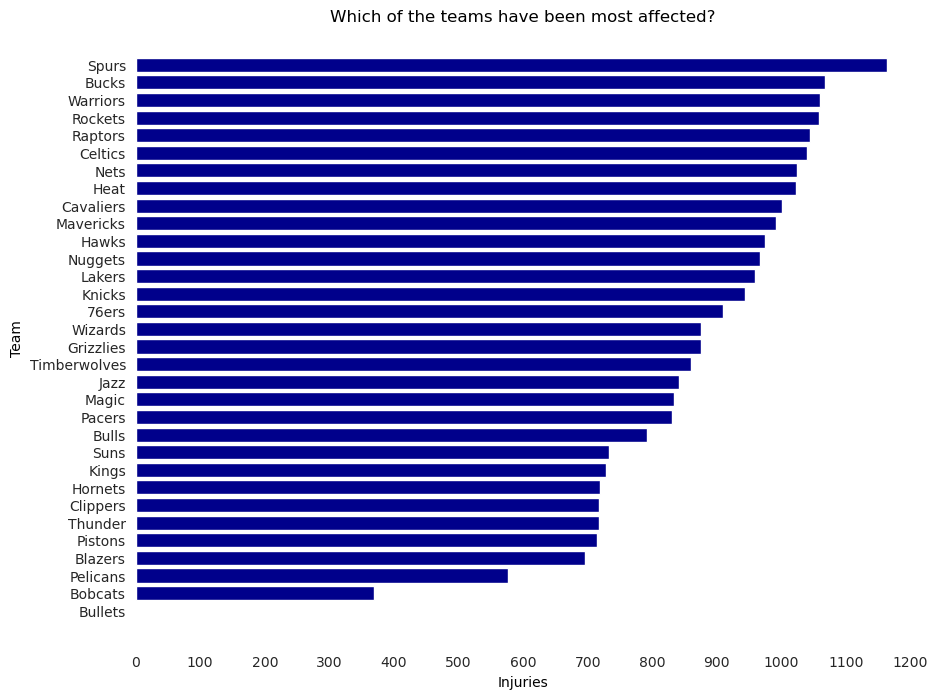

In [32]:
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Calculate the frequencies
counts = df['Team'].value_counts()

# Set the style
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams['font.family'] = 'Helvetica'

# Create the histogram with axes swapped
plt.figure(figsize=(10,8)) # Adjust the size of the figure
bars = plt.barh(counts.index, counts.values, color='darkblue')

# Adjust the axes
plt.gca().invert_yaxis() # Invert the Y axis so the team with the highest frequency is at the top
plt.xlim([0, 1200]) # Set the range of the X axis
plt.gca().xaxis.set_major_locator(MultipleLocator(100)) # Set the increments of the X axis
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(4)) 

# Hide axis lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adjust titles and labels
plt.title('Which of the teams have been most affected?', fontname='Helvetica', color='black') 
plt.xlabel('Injuries', fontname='Helvetica', color='black') 
plt.ylabel('Team', fontname='Helvetica', color='black') 

plt.show()

#### The four teams with more injuries were:

- San Antonio Spurs 
- Milwaukee Bucks.
- Golden State Warriors
- Houston Rockets.

### 5.2 Which players are the most injured?

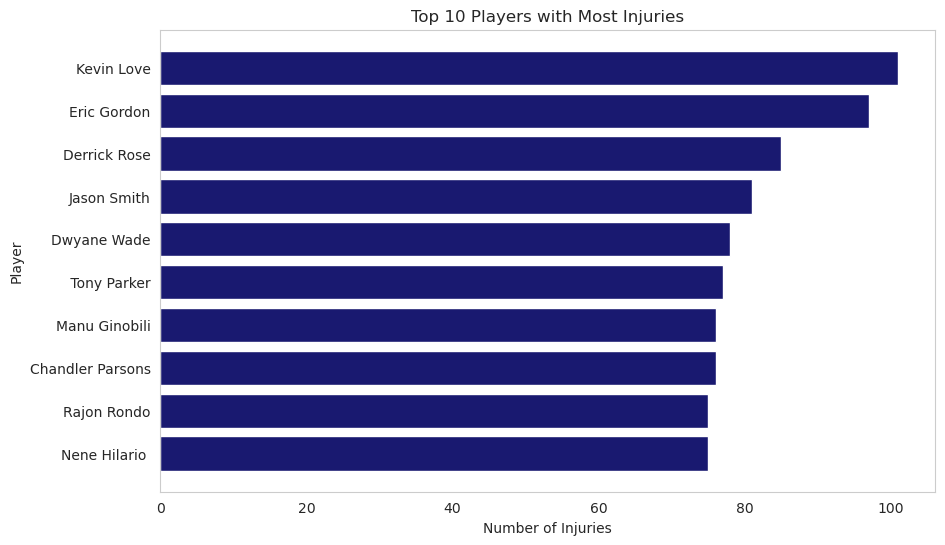

In [35]:
# Top 10 players
top_10_injured_players = df['Relinquished'].value_counts().nlargest(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_injured_players.index, top_10_injured_players.values, color='midnightblue')
plt.xlabel('Number of Injuries')
plt.ylabel('Player')
plt.title('Top 10 Players with Most Injuries')
plt.gca().invert_yaxis() # So that the player with the most injuries appears at the top
plt.show()

We can see how Kevin Love, Eric Gordon and Derrick Rose are the most injured players between 2010-2020 in the NBA. The distribution of the number of times each player appears on our list is shown below.

### 5.3 Injuries over time 

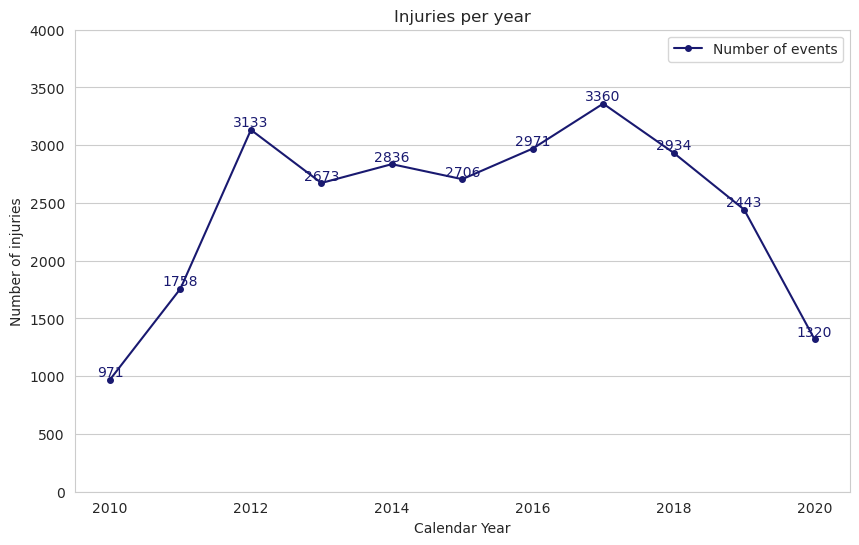

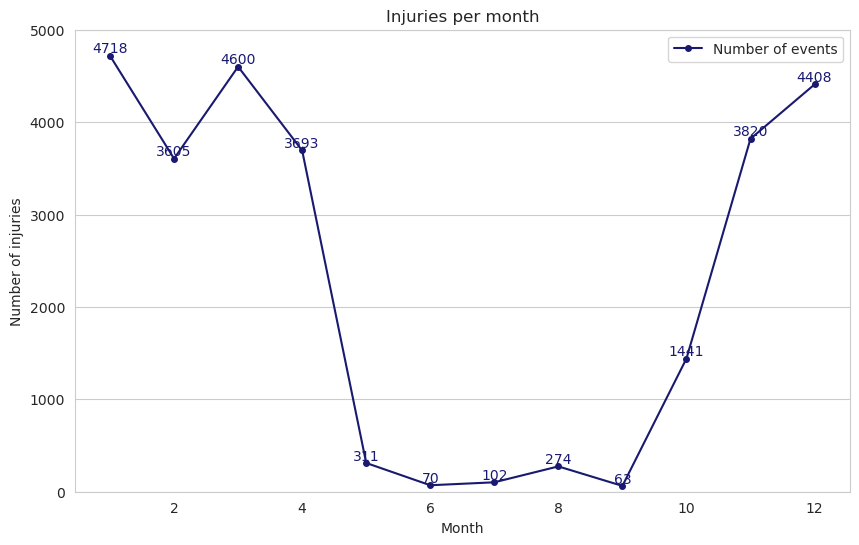

In [54]:
# Extracting year and month from the date column 
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Plot 1: Tracking injury events over time (by year)
it1 = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(it1.index, it1.values, color='midnightblue', marker='o', markersize=4, label='Number of events')
plt.ylim(0, 4000)
plt.title('Injuries per year')
plt.xlabel('Calendar Year')
plt.ylabel('Number of injuries')
plt.legend()

# Add labels for the number of events
for x, y in zip(it1.index, it1.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='midnightblue')

plt.grid(True, axis='y')
plt.show()

# Plot 2: Highest Injury Month
it2 = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(it2.index, it2.values, color='midnightblue', marker='o', markersize=4, label='Number of events')
plt.ylim(0, 5000)
plt.title('Injuries per month')
plt.xlabel('Month')
plt.ylabel('Number of injuries')
plt.legend()

# Add labels for the number of events
for x, y in zip(it2.index, it2.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='midnightblue')

plt.grid(True, axis='y')
plt.show()

Yearly: We can see how injuries increase continuously until reaching their first peak in 2012 with 3,133 injuries in total, and then enter a trend of very minimal decreases and increases between 2,600 and 2,900 approximately. After the highest peak of the entire sample in 2017, we can see how the injuries are declining sharply.

Monthly: From the beginning of the season in October, injury events trend upwards as the season progresses, rising to a peak in Juanuary-March. The notable exception though is the "dip seen" in February. Given the season takes pause for the All-Star weekend, games aren’t played the most month with the break spanning a week or so.

## 6. Injury types 

### 6.1 What injuries are occurring?

In [56]:
#Reviewing the most recurrent injuries
notes_count = df['Notes'].value_counts().reset_index()
notes_count.columns = ['Notes', 'Count']
notes_count = notes_count.sort_values('Count', ascending=False)

print(notes_count)

                                                  Notes  Count
0                                     activated from IL   7342
1                                          placed on IL   3390
2                                    returned to lineup   2086
3                             sprained left ankle (DNP)    362
4                                            rest (DTD)    286
...                                                 ...    ...
1829  surgery on left knee to remove 2 screws (out f...      1
1828  placed on IL with sore left wrist (out for sea...      1
1827      placed on IL for knee injury (out for season)      1
1826                          flu/gastroenteritis (DTD)      1
3113  placed on IL with strained right adductor (out...      1

[3114 rows x 2 columns]


There are some interesting observations from the table above:

- Firstly, rest (DNP) and rest (DTD) appear quite frequently. I will separate these out shortly.
- DNP (did not play) and DTD (day-to-day) are both captured. I will create a feature to represent this.
- Each body part can either be sprained, sore, strained, broken etc. I will further code these injury types

### 6.2 Shaping the dataset

In [59]:
import re

# Create a new column 'status' by extracting text between parentheses in 'Notes'
df['status'] = df['Notes'].str.extract(r'\((.*?)\)', expand=False)
df['status'] = df['status'].str.replace(r'\).*', '', regex=True)

# Create a new column 'rest' indicating whether the cause was rest
df['rest'] = df['Notes'].str.contains('rest', regex=True)

# Split 'Notes' into two new variables
inj_event = df['Notes'].str.split(r' \(', n=1, expand=True, regex=True)
df['cause'] = inj_event[0]
df['status'] = inj_event[1].str.replace(r'\)', '', regex=True)

# Print the resulting DataFrame
print(df)

             Date     Team      Acquired   Relinquished  \
0      2010-10-03    Bulls           NaN  Carlos Boozer   
1      2010-10-06  Pistons           NaN  Jonas Jerebko   
2      2010-10-06  Pistons           NaN  Terrico White   
3      2010-10-08  Blazers           NaN     Jeff Ayres   
4      2010-10-08     Nets           NaN    Troy Murphy   
...           ...      ...           ...            ...   
27100  2020-09-30   Lakers  Dion Waiters            NaN   
27101  2020-10-02     Heat           NaN    Bam Adebayo   
27102  2020-10-02     Heat           NaN   Goran Dragic   
27103  2020-10-02     Heat   Chris Silva            NaN   
27104  2020-10-06     Heat   Bam Adebayo            NaN   

                                                   Notes  Year  Month  \
0      fractured bone in right pinky finger (out inde...  2010     10   
1          torn right Achilles tendon (out indefinitely)  2010     10   
2      broken fifth metatarsal in right foot (out ind...  2010     10   

### 6.3 Resting players 

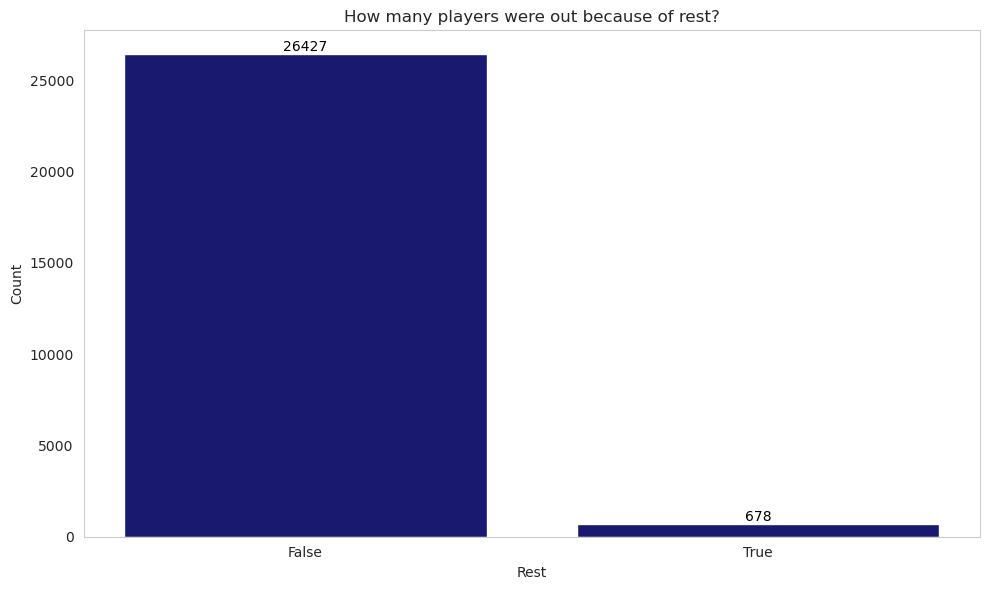

In [62]:
# Creating the graph
rest_counts = df['rest'].value_counts().reset_index()
rest_counts.columns = ['rest', 'Count']
rest_counts = rest_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(rest_counts['rest'], rest_counts['Count'], color='midnightblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom', color='black', fontsize=10)

plt.xticks([0, 1], ['False', 'True'])
plt.title('How many players were out because of rest?')
plt.xlabel('Rest')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Only 678 events were coded as rest. That’s only 2,5%. Still, it was enough for the NBA top brass to question teams over their handling of players in games with little meaning heading in to the Playoffs.  Teams were resting players and it was said to be bad for business - fans come out to watch their stars on the court, not in street clothes. Additionally, teams may also rest players to increase their chances of finishing lower and having more balls in the lottery.

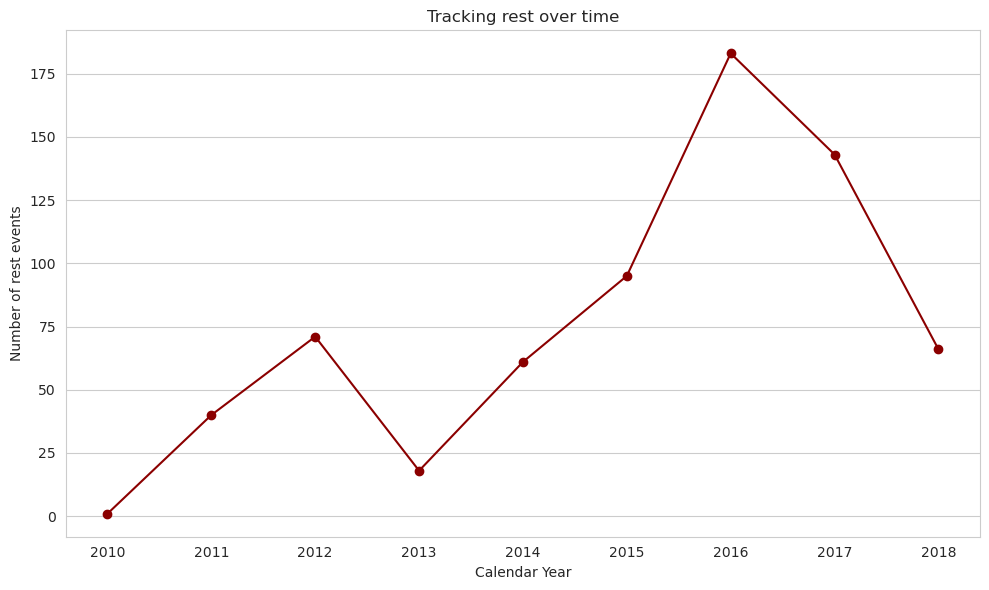

In [71]:
# Extract year and month from the 'Date' column
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month

# Filter the data for rest events
rest_data = df[df['rest'] == True]

# Line plot by year
rest_by_year = rest_data['year'].value_counts().reset_index().rename(columns={'index': 'year', 'year': 'count'})
rest_by_year = rest_by_year.sort_values('year')

plt.figure(figsize=(10, 6))
plt.plot(rest_by_year['year'], rest_by_year['count'], color='darkred', marker='o')
plt.xlabel('Calendar Year')
plt.ylabel('Number of rest events')
plt.title('Tracking rest over time')
plt.xticks(rotation=0)  # Rotate x-axis labels to be displayed horizontally
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Overall, there is an upward trend in players being held out because of rest, with a very big spike in 2016, while 2013 was at the other end of the spectrum with the lowest amount. Rest events peak in April - largely explained by teams heading in to playoffs - which start in mid-April - looking to rest players before they start.

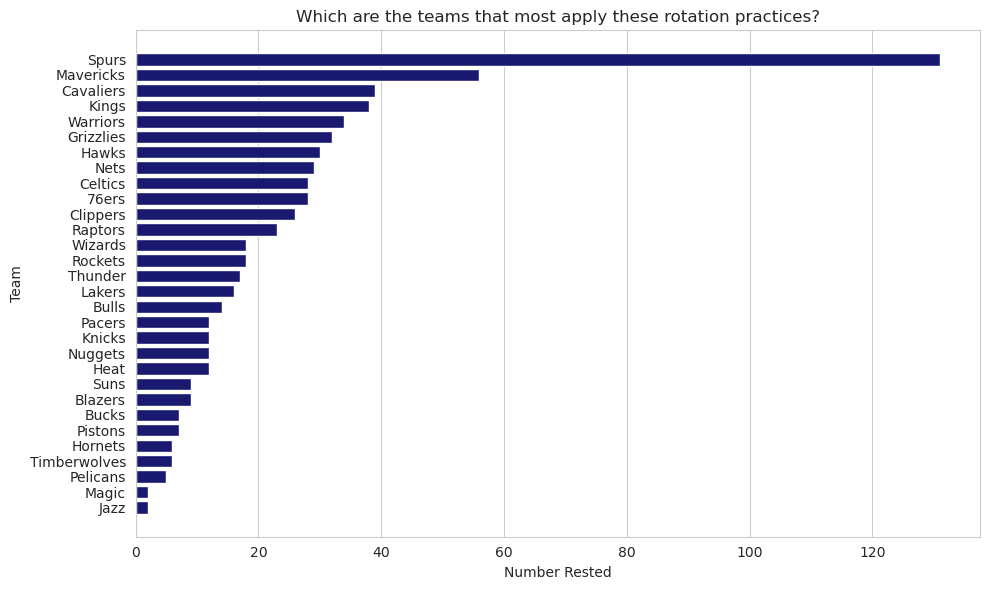

In [73]:
# Filter the data for rest events
rest_data = df[df['rest'] == True]

# Count the occurrences for each team and arrange in descending order
team_counts = rest_data['Team'].value_counts().reset_index().rename(columns={'index': 'Team', 'Team': 'Number Rested'})
team_counts = team_counts.sort_values('Number Rested', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(team_counts['Team'], team_counts['Number Rested'], color='midnightblue')
plt.xlabel('Number Rested')
plt.ylabel('Team')
plt.title('Which are the teams that most apply these rotation practices?')
plt.grid(axis='x')
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert the y-axis to display bars from top to bottom
plt.show()

It appears from this graph that Popovich was the coach who most often carried out this so-called "load management".

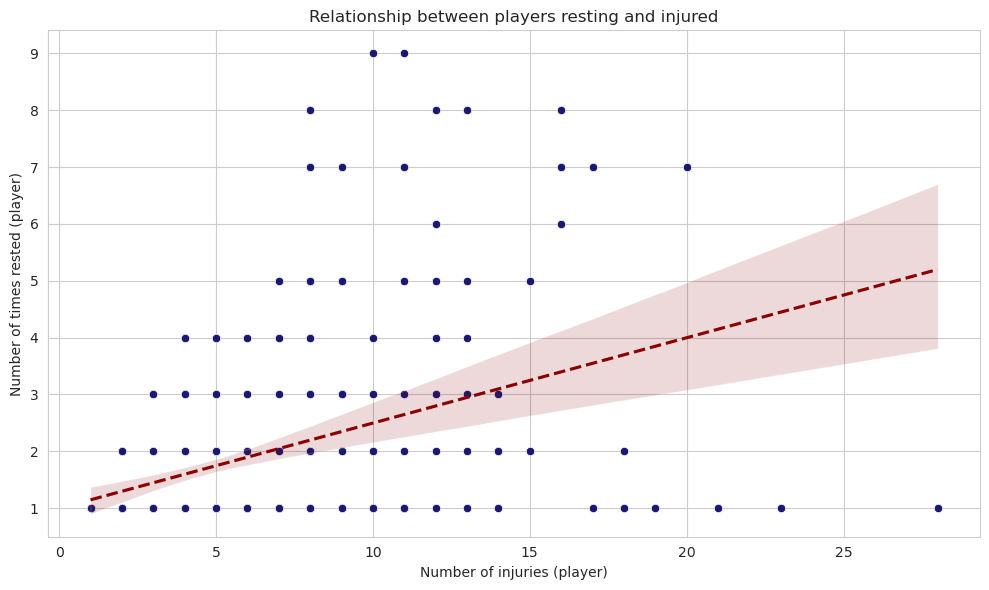

In [74]:
# Extract year from the 'Date' column and create a new 'year' column
df['year'] = pd.to_datetime(df['Date']).dt.year

# Filter the data for rest events
rest_data = df[df['rest'] == True]

# Group by year and player for rest events
rest_grouped = rest_data.groupby(['year', 'Relinquished']).size().reset_index(name='num_rested')

# Group by year and player for all injuries
injury_grouped = df.groupby(['year', 'Relinquished']).size().reset_index(name='num_injuries')

# Merge the two dataframes
rest_injury_merged = pd.merge(rest_grouped, injury_grouped, on=['year', 'Relinquished'], how='left')

# Filter the merged dataframe for the desired years
rest_injury_filtered = rest_injury_merged[(rest_injury_merged['year'] > 2010) & (rest_injury_merged['year'] < 2020)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rest_injury_filtered, x='num_injuries', y='num_rested', color='midnightblue')
sns.regplot(data=rest_injury_filtered, x='num_injuries', y='num_rested', scatter=False, color='darkred', line_kws={'linestyle': 'dashed'})
plt.title('Relationship between players resting and injured')
plt.xlabel('Number of injuries (player)')
plt.ylabel('Number of times rested (player)')
plt.grid(axis='both')
plt.tight_layout()
plt.show()

In [75]:
correlation = rest_injury_filtered['num_injuries'].corr(rest_injury_filtered['num_rested'])
print("Correlation between number of injuries and number of times rested:")
print(correlation)

Correlation between number of injuries and number of times rested:
0.3943482596829581


There appears to be a weak-moderate positive correlation (0.394348) between the number of times a player is injured and how much rest he is given.

## 7. Injury analysis 

### 7.1 Hamstring injuries 

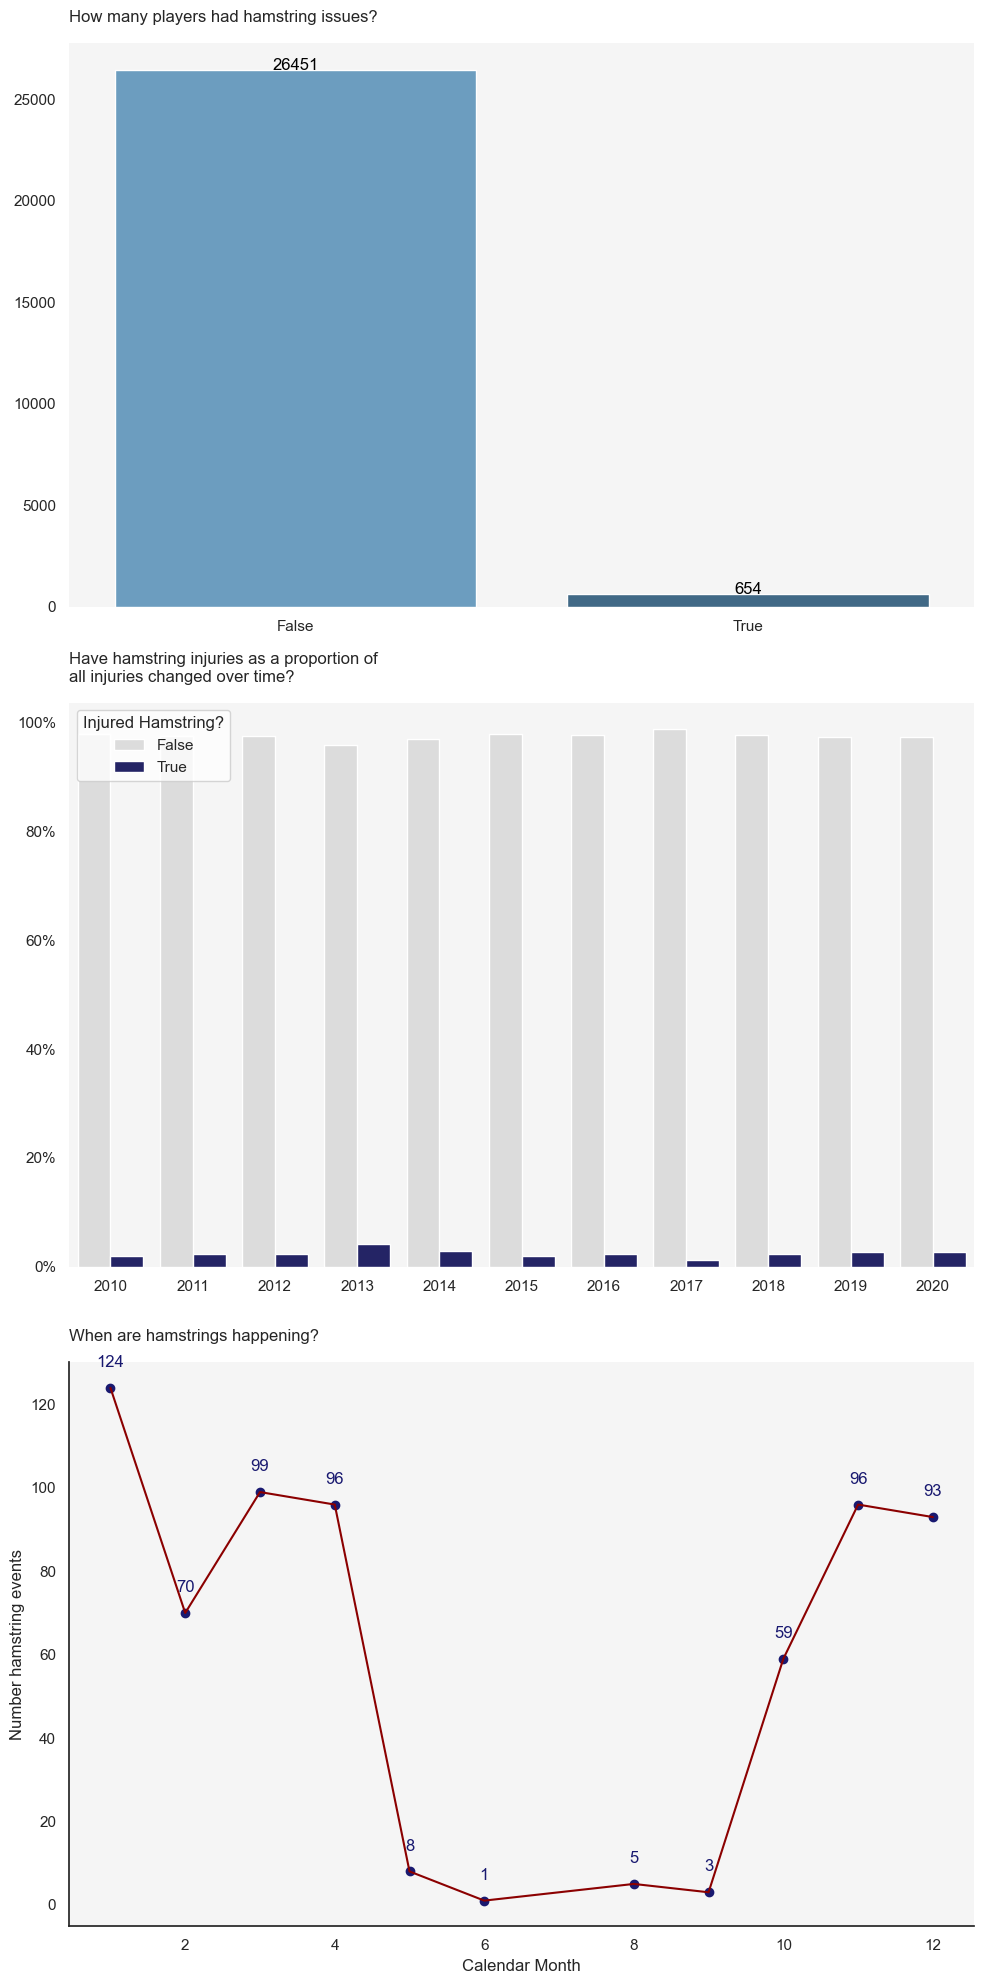

In [10]:
from matplotlib.ticker import PercentFormatter

# Assuming that the date is stored as a string in 'Date' column, we first convert it to datetime and then extract the year and month
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%d/%m')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Create a subplot with three plots
fig, axs = plt.subplots(nrows=3, figsize=(10, 20))

# First plot
sns.set_theme(style="white")
hamstring_counts = df['hamstring_inj'].value_counts()
hamstring_counts_df = pd.DataFrame({'hamstring_inj': hamstring_counts.index, 'n': hamstring_counts.values})
bar_plot1 = sns.barplot(x='hamstring_inj', y='n', data=hamstring_counts_df, palette="Blues_d", ax=axs[0])
for index, row in hamstring_counts_df.iterrows():
    bar_plot1.text(row.name,row.n, round(row.n,2), color='black', ha="center")
bar_plot1.set(xlabel=None, ylabel=None)
bar_plot1.set_title("How many players had hamstring issues?", loc='left', pad=15)
sns.despine(left=True, bottom=True, ax=axs[0])
axs[0].grid(False)
axs[0].set_facecolor('whitesmoke')

# Second plot
grouped_data = df.groupby('year')['hamstring_inj'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
bar_plot2 = sns.barplot(x='year', y='percent', hue='hamstring_inj', data=grouped_data, palette=["gainsboro", "midnightblue"], ax=axs[1])
bar_plot2.yaxis.set_major_formatter(PercentFormatter())
bar_plot2.legend(title='Injured Hamstring?', loc='upper left')
bar_plot2.set(xlabel=None, ylabel=None)
bar_plot2.set_title("Have hamstring injuries as a proportion of \nall injuries changed over time?", loc='left', pad=15)
sns.despine(left=True, bottom=True, ax=axs[1])
axs[1].grid(False)
axs[1].set_facecolor('whitesmoke')

# Third plot
ham6 = df[df['hamstring_inj'] == True]['month'].value_counts().sort_index().reset_index()
ham6.columns = ['month', 'n']
line_plot = sns.lineplot(x='month', y='n', data=ham6, color="darkred", ax=axs[2])
plt.scatter(ham6['month'], ham6['n'], color='midnightblue')
for i in range(ham6.shape[0]):
    plt.text(x=ham6['month'][i], y=ham6['n'][i]+5, s=ham6['n'][i], color='midnightblue', ha='center')
line_plot.set_title("When are hamstrings happening?", loc='left', pad=15)
line_plot.set_xlabel("Calendar Month")
line_plot.set_ylabel("Number hamstring events")
sns.despine(ax=axs[2])
axs[2].grid(False)
axs[2].set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

During the period analysed, there were 379 hamstring related notes (2.47%). This type of injury peaked in 2013 and then progressively declined until reaching its lowest point in 2017, but after that continued with relatively stable growth and no high points until 2020.

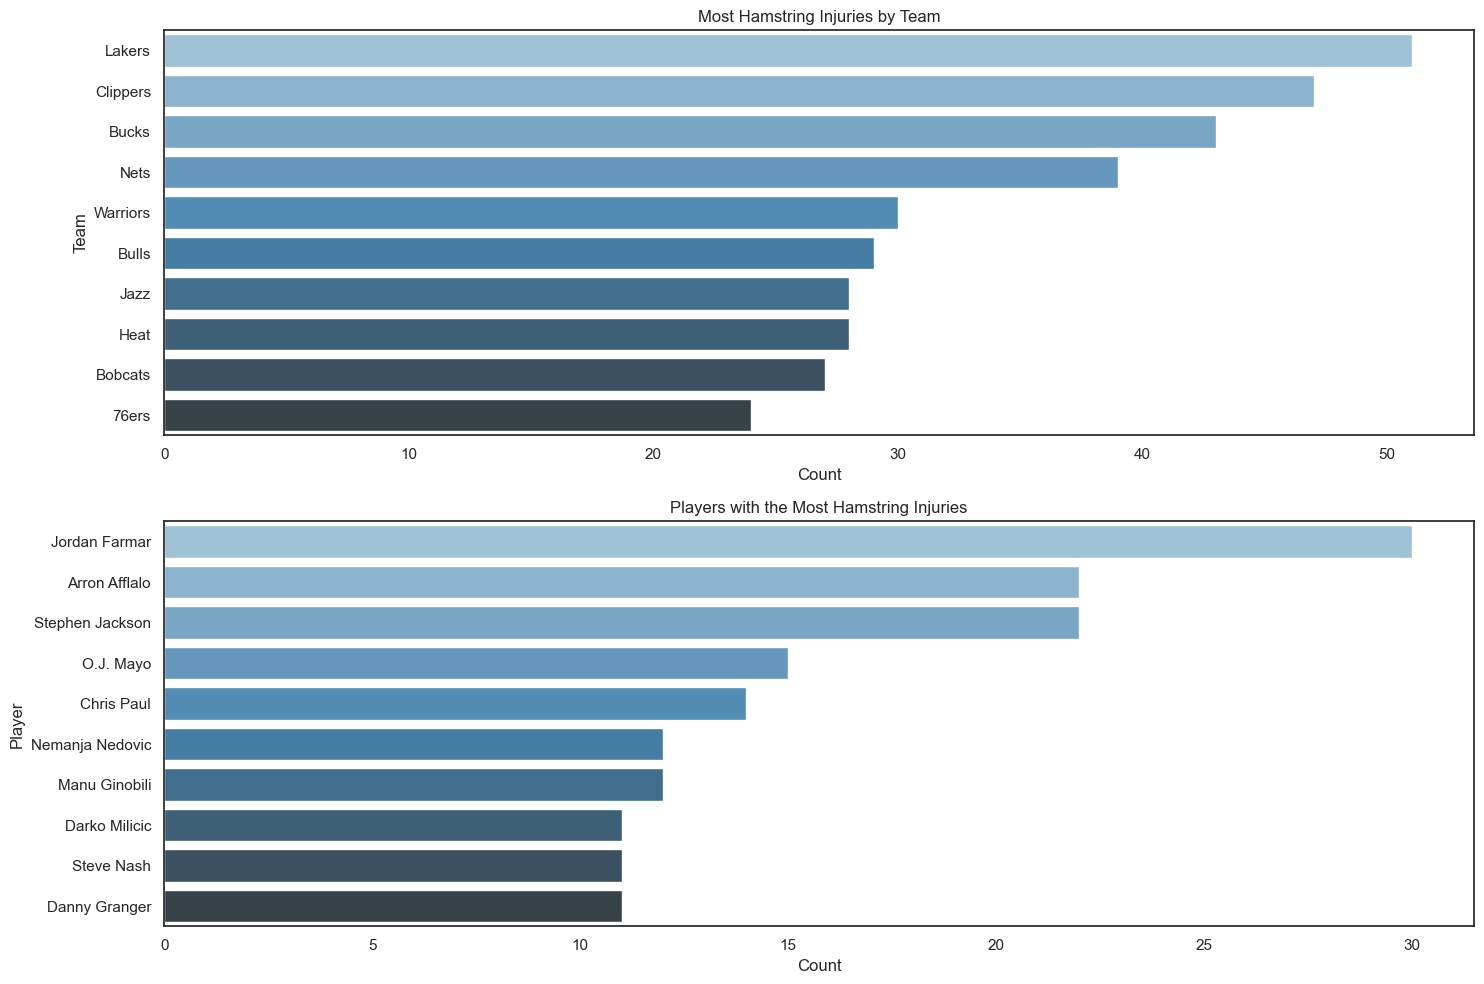

In [15]:
# Create a dataframe for the top 10 teams with the most hamstring injuries
top_teams = df[df['hamstring_inj'] == True]['Team'].value_counts().head(10).reset_index()
top_teams.columns = ['Team', 'Count']

# Create a dataframe for the top 10 players with the most hamstring injuries
top_players = df[df['hamstring_inj'] == True]['Relinquished'].value_counts().head(10).reset_index()
top_players.columns = ['Player', 'Count']

# Create subplots
fig, axs = plt.subplots(2, figsize=(15, 10))

# Plot the top teams with the most hamstring injuries
sns.barplot(x='Count', y='Team', data=top_teams, ax=axs[0], palette='Blues_d')
axs[0].set_title('Most Hamstring Injuries by Team')

# Plot the top players with the most hamstring injuries
sns.barplot(x='Count', y='Player', data=top_players, ax=axs[1], palette='Blues_d')
axs[1].set_title('Players with the Most Hamstring Injuries')

# Show the plot
plt.tight_layout()
plt.show()

The Lakers had the most hamstrings during the period, with the Bucks and Clippers rounding out the top three. Jordan Farmar was by far the most affected by hamstrings.

### 7.2 Knee injuries 

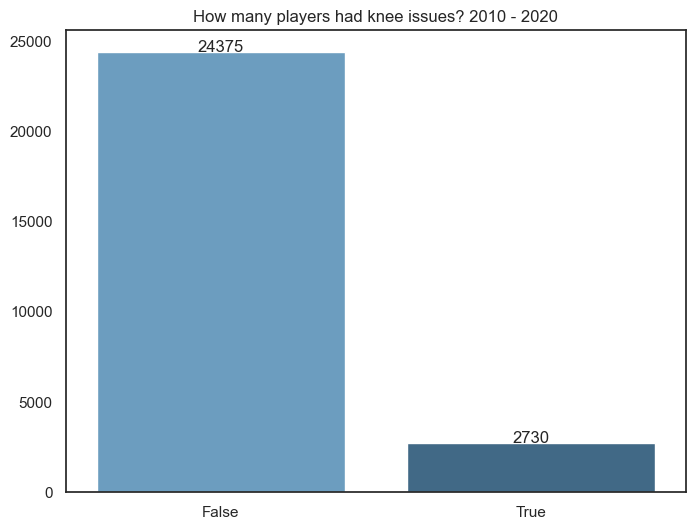

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['year'] = df['Date'].dt.year

# Generate a count of knee injuries
knee_count = df['knee_inj'].value_counts().reset_index()
knee_count.columns = ['knee_inj', 'n']

# Create a bar plot for the count of knee injuries
plt.figure(figsize=(8, 6))
barplot1 = sns.barplot(x='knee_inj', y='n', data=knee_count, palette="Blues_d")

# Add the count on top of each bar
for i in range(knee_count.shape[0]):
    barplot1.text(x=i, y=knee_count['n'].iloc[i], s=knee_count['n'].iloc[i], ha='center')

plt.title("How many players had knee issues? 2010 - 2020")
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.show()

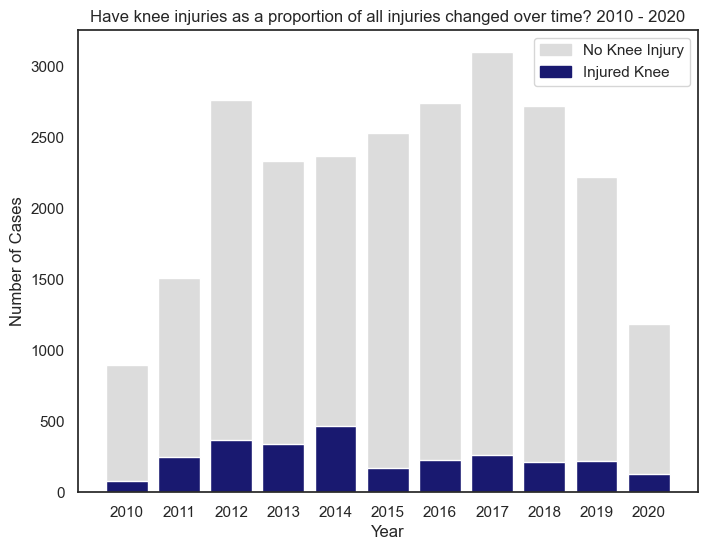

In [43]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['year'] = df['Date'].dt.year

# Calculate the total number of injuries per year
total_injuries_year = df.groupby(df['Date'].dt.year).size().reset_index()
total_injuries_year.columns = ['Year', 'Total_Injuries']

# Calculate the number of knee injuries per year
knee_injuries_year = df[df['knee_inj']==True].groupby(df['Date'].dt.year).size().reset_index()
knee_injuries_year.columns = ['Year', 'Knee_Injuries']

# Merge the two dataframes
injuries_year = pd.merge(total_injuries_year, knee_injuries_year, on='Year')

# Calculate the proportion of knee injuries
injuries_year['Proportion'] = (injuries_year['Knee_Injuries'] / injuries_year['Total_Injuries']) * 100

# Calculate the number of knee and no knee injuries per year 
knee_counts = df.groupby(['year', 'knee_inj']).size().unstack().reset_index()
knee_counts.columns = ['Year', 'No Knee Injury', 'Injured Knee']

# Plot
plt.figure(figsize=(8, 6))
plt.bar(knee_counts['Year'], knee_counts['No Knee Injury'], color='gainsboro')
plt.bar(knee_counts['Year'], knee_counts['Injured Knee'], color='midnightblue')
plt.title("Have knee injuries as a proportion of all injuries changed over time? 2010 - 2020")
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(['No Knee Injury', 'Injured Knee'], loc='upper right')
plt.xticks(knee_counts['Year'], rotation=0)
plt.grid(False)

# Agregar leyenda
legend_labels = ['No Knee Injury', 'Injured Knee']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color='gainsboro'), plt.Rectangle((0, 0), 1, 1, color='midnightblue')]
plt.legend(legend_handles, legend_labels, loc='upper right')

plt.show()

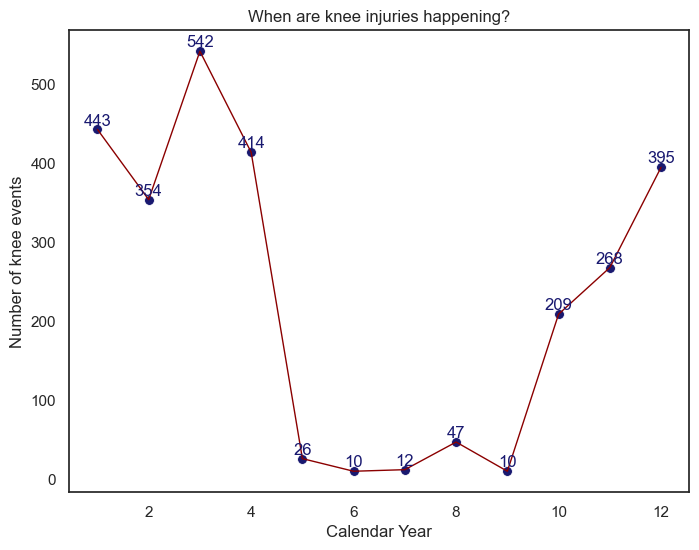

In [29]:
# Filter the dataframe for knee injuries and count occurrences by month
knee_monthly = df[df['knee_inj'] == True].groupby('month').size().reset_index()
knee_monthly.columns = ['Month', 'Count']

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Month', y='Count', data=knee_monthly, color='darkred', linewidth=1)
sns.scatterplot(x='Month', y='Count', data=knee_monthly, color='midnightblue', s=50)
for i in range(knee_monthly.shape[0]):
    plt.text(knee_monthly['Month'].iloc[i], knee_monthly['Count'].iloc[i]+5, knee_monthly['Count'].iloc[i], color='midnightblue', ha='center')
plt.title("When are knee injuries happening?")
plt.xlabel("Calendar Year")
plt.ylabel("Number of knee events")
plt.grid(False)
plt.show()

During the period analysed, there were 2730 hamstring related notes (11,20%). The proportion of knee-related injuries to other injury types shows that there were twin peaks - one in 2012 and one in 2014. Each time these have dropped significantly the following year, then slowly started increasing.

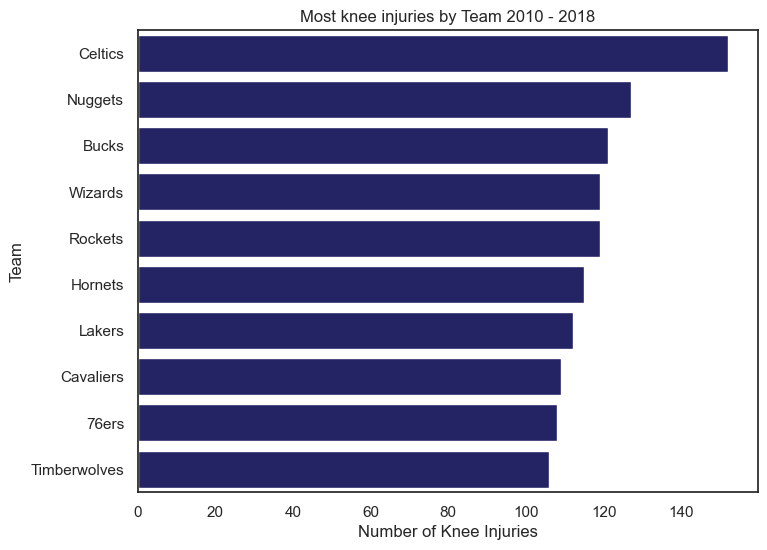

In [44]:
# Filtrar el dataframe para las lesiones de rodilla y contar las ocurrencias por equipo
knee_teams = df[df['knee_inj'] == True].groupby('Team').size().reset_index()
knee_teams.columns = ['Team', 'Count']
knee_teams = knee_teams.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Team', data=knee_teams, color='midnightblue', edgecolor='white')
plt.title("Most knee injuries by Team 2010 - 2018")
plt.xlabel('Number of Knee Injuries')
plt.ylabel('Team')
plt.grid(False)
plt.show()

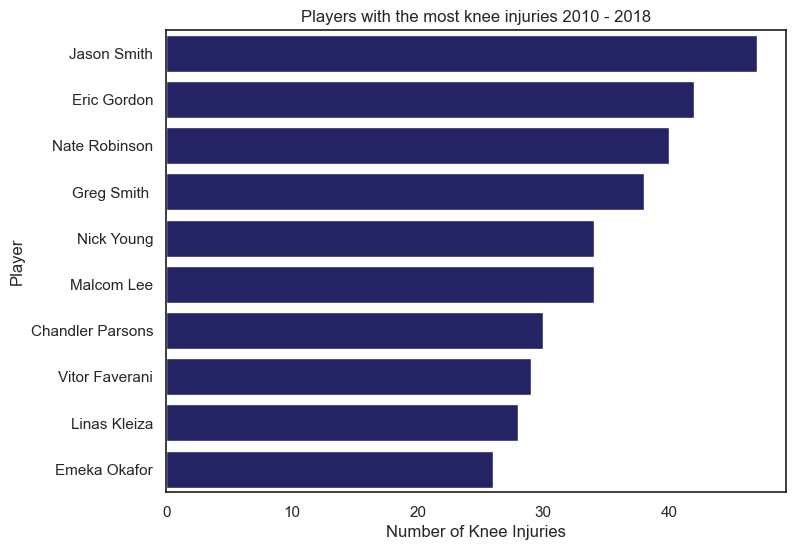

In [46]:
# Filtrar el dataframe para las lesiones de rodilla y contar las ocurrencias por jugador
knee_players = df[df['knee_inj'] == True].groupby('Relinquished').size().reset_index()
knee_players.columns = ['Player', 'Count']
knee_players = knee_players.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Player', data=knee_players, color='midnightblue', edgecolor='white')
plt.title("Players with the most knee injuries 2010 - 2018")
plt.xlabel('Number of Knee Injuries')
plt.ylabel('Player')
plt.grid(False)
plt.show()

With these graphs, we can see the injury trend that we marked previously with J. Smith and E. Gordon, which reaffirms the consistency of our analysis at the top of the study. In the case of the teams, we can see how some of those who have already been injured in hamstring injuries are back again, so this could be a big alert for these teams at the medical level and also to analyze within their signing policies. 

## 8. Possible next steps

The next piece of this analysis will aim to bring in additional player data and try to start modelling whether various injury types can be predicted, or at the very least whether certain players are at greater risk than others for injuries.

Hope you enjoyed this notebook!

Cesar Alonso